In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("Hu_sk_dataset.csv")
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,80
0,0,0.png,416.027405,212.334763,0.911107,424.742737,206.524521,0.949083,418.932495,203.619400,...,467.985413,0.891612,468.319580,479.605896,0.785333,453.793945,470.890503,0.890539,3.076171,7
1,1,10.png,411.591034,213.453430,0.948837,417.534088,204.538834,0.911991,414.562561,204.538834,...,469.005341,0.848405,471.021698,477.919952,0.764094,453.192505,471.976868,0.892658,3.019633,7
2,2,20.png,409.421112,215.449310,0.951167,415.245483,206.712738,0.933428,409.421112,206.712738,...,465.897614,0.894365,467.664886,480.458557,0.790847,453.103943,471.721985,0.850276,3.105330,7
3,3,30.png,407.601929,215.433823,0.964128,416.332794,206.702942,0.942259,407.601929,206.702942,...,468.629578,0.867242,468.718140,480.270782,0.774923,451.256348,471.539886,0.880984,3.042257,7
4,4,40.png,404.583527,216.670563,0.935175,410.359406,208.006729,0.931781,404.583527,208.006729,...,467.921509,0.897768,471.006195,479.473267,0.732927,450.790588,470.809448,0.899404,3.013678,7


In [3]:
dataset = dataset.drop(["Unnamed: 0"],axis = 1)

In [4]:
y= dataset['80']
X= dataset.drop(['80','0'], axis=1)
testing=dataset.copy()
testing=testing.drop(['0'], axis=1)
train, test = train_test_split(testing, test_size=0.2)
temp_df = train.groupby(['80']).size().reset_index().rename(columns={0:'count'})
total_count = np.sum(temp_df['count'].values)
temp_df['class%'] = (temp_df['count'] / total_count) * 100
lowest_pct = min(temp_df['class%'])
temp_df['class_weight'] = lowest_pct / temp_df['class%']
class_weight = temp_df[['80', 'class_weight']].to_dict()['class_weight']
class_weight

{0: 0.3846153846153847,
 1: 0.6250000000000001,
 2: 0.7142857142857143,
 3: 1.0,
 4: 0.7142857142857143,
 5: 0.031446540880503145,
 6: 0.10869565217391305,
 7: 0.31250000000000006,
 8: 0.5,
 9: 0.3333333333333334,
 10: 0.042735042735042736}

In [5]:
cat_cols_indices = np.where(X.dtypes != np.float)[0]
Xtrain = train.loc[:, train.columns != '80' ].copy()
Ytrain = train['80'].copy()-1
Xtest = test.loc[:, train.columns != '80' ].copy()

print("Xtrain: {} \nYtrain: {} \nXtest: {}".format(Xtrain.shape, Ytrain.shape, Xtest.shape))

Xtrain: (403, 79) 
Ytrain: (403,) 
Xtest: (101, 79)


C:\Users\91750\AppData\Local\Temp/ipykernel_21920/941882327.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols_indices = np.where(X.dtypes != np.float)[0]


In [12]:
Ytrain

436     9
187     5
440     9
264     5
104     3
       ..
445     9
473    10
488    10
474    10
111    10
Name: 80, Length: 403, dtype: int64

In [13]:
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(Xtrain, Ytrain.values)
 
# performing predictions on the test dataset
y_pred = clf.predict(Xtest)
 

In [14]:
target= test['80'].copy()-1
y_test=target
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
Raccuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % Raccuracy)
# precision tp / (tp + fp)
Rprecision = precision_score(y_test,y_pred,average='macro')
print('Precision: %f' % Rprecision)
# recall: tp / (tp + fn)
Rrecall = recall_score(y_test,y_pred,average='macro')
print('Recall: %f' % Rrecall)
# f1: 2 tp / (2 tp + fp + fn)
Rf1 = f1_score(y_test,y_pred,average='macro')
print('F1 score: %f' % Rf1)

Accuracy: 0.891089
Precision: 0.829148
Recall: 0.686887
F1 score: 0.724798


C:\Users\91750\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


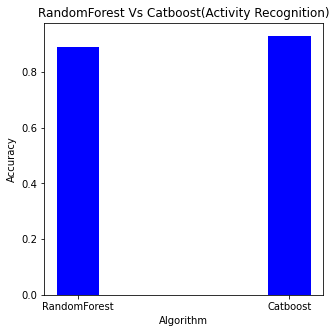

In [15]:
import numpy as np
import matplotlib.pyplot as plt
catboost=0.93
data = {'RandomForest':Raccuracy, 'Catboost':catboost}
algorithm = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(algorithm, accuracy, color ='blue',
        width = 0.2)
 
plt.title("RandomForest Vs Catboost(Activity Recognition)")
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
plt.show()

In [16]:
#fall / Not Fall detection accuracy
o_testdata=[]
for i in target:
  if(i<5):
    o_testdata.append(0)
  else:
    o_testdata.append(1)
o_preddata=[]  
for i in y_pred:
  if(i<5):
    o_preddata.append(0)
  else:
    o_preddata.append(1)
y_test,y_pred=o_testdata,o_preddata
Rfaccuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % Rfaccuracy)
# precision tp / (tp + fp)
Rprecision = precision_score(y_test,y_pred)
print('Precision: %f' % Rprecision)
# recall: tp / (tp + fn)
Rrecall = recall_score(y_test,y_pred)
print('Recall: %f' % Rrecall)
# f1: 2 tp / (2 tp + fp + fn)
Rf1 = f1_score(y_test,y_pred)
print('F1 score: %f' % Rf1)

Accuracy: 0.920792
Precision: 0.916667
Recall: 1.000000
F1 score: 0.956522


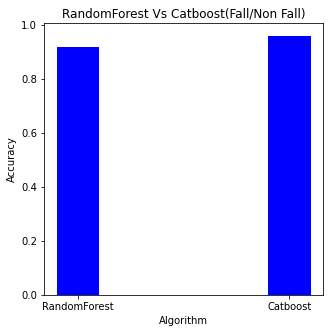

In [17]:
import numpy as np
import matplotlib.pyplot as plt
catboost=0.96
data = {'RandomForest':Rfaccuracy, 'Catboost':catboost}
algorithm = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(algorithm, accuracy, color ='blue',
        width = 0.2)
 
plt.title("RandomForest Vs Catboost(Fall/Non Fall)")
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
plt.show()